In [1]:
using Gadfly
using DataFrames
using CSV

In [2]:
experiments = map(x -> "exp$x", [1,2,3,5])

dfs = map(exp -> readtable(joinpath("out", "$exp.csv")), experiments)
df_infos = map(exp -> readtable(joinpath("out", "info-$exp.csv")), experiments)

df = vcat(dfs...)
df = DataFrames.rename(df, Dict(:x => :prey, :y => :predator))

,t,prey,predator,exp
1,0.0,2.0,6.0,exp1
2,0.01,1.786532319517677,6.280472132702699,exp1
3,0.018621008302697216,1.614076445902532,6.4894822966372665,exp1
4,0.03106705511918447,1.3860691099853508,6.735677453271138,exp1
5,0.04428732375279348,1.17224925217375,6.925921112091306,exp1
6,0.06017721374452347,0.9533972107241742,7.06348231929042,exp1
7,0.07796570207536838,0.7539568231161027,7.113862222166309,exp1
8,0.09911967473652789,0.5703868632032435,7.05854278247715,exp1
9,0.12379363009678038,0.41435515125507694,6.878225728303975,exp1
10,0.1463945387697172,0.31218885026670273,6.640250813909979,exp1


In [3]:
summ = aggregate(df, :exp, [mean, maximum, minimum])

,exp,t_mean,t_maximum,t_minimum,prey_mean,prey_maximum,prey_minimum,predator_mean,predator_maximum,predator_minimum
1,exp1,9.75707053427623,20.0,0.0,1.0638429947199612,4.783425417508634,0.008215290100263091,1.6498861994721352,7.113862222166309,4.735204588186535e-6
2,exp2,9.726806827252414,20.0,0.0,1.3630377532875815,2.0895129321533483,0.7864011485235857,1.2443565150525902,1.7382251912173363,0.7847731142560538
3,exp3,9.04487909572682,20.0,0.0,0.5197890400751162,1.2741781367956113,0.12885206637652974,0.6239434583750211,1.273969369732474,0.1288482078804334
4,exp5,9.951111468486639,20.0,0.0,0.9427555320417338,1.9170510962105372,0.35160098441010545,1.016759065721926,2.0053254310459034,0.31074248021740714


In [4]:
df[:diff] = map((x,y) -> x - y, df[:predator], df[:prey])
df

,t,prey,predator,exp,diff
1,0.0,2.0,6.0,exp1,4.0
2,0.01,1.786532319517677,6.280472132702699,exp1,4.493939813185023
3,0.018621008302697216,1.614076445902532,6.4894822966372665,exp1,4.875405850734735
4,0.03106705511918447,1.3860691099853508,6.735677453271138,exp1,5.349608343285787
5,0.04428732375279348,1.17224925217375,6.925921112091306,exp1,5.753671859917556
6,0.06017721374452347,0.9533972107241742,7.06348231929042,exp1,6.110085108566246
7,0.07796570207536838,0.7539568231161027,7.113862222166309,exp1,6.359905399050206
8,0.09911967473652789,0.5703868632032435,7.05854278247715,exp1,6.488155919273907
9,0.12379363009678038,0.41435515125507694,6.878225728303975,exp1,6.463870577048898
10,0.1463945387697172,0.31218885026670273,6.640250813909979,exp1,6.328061963643277


* x - prey
* y - predators

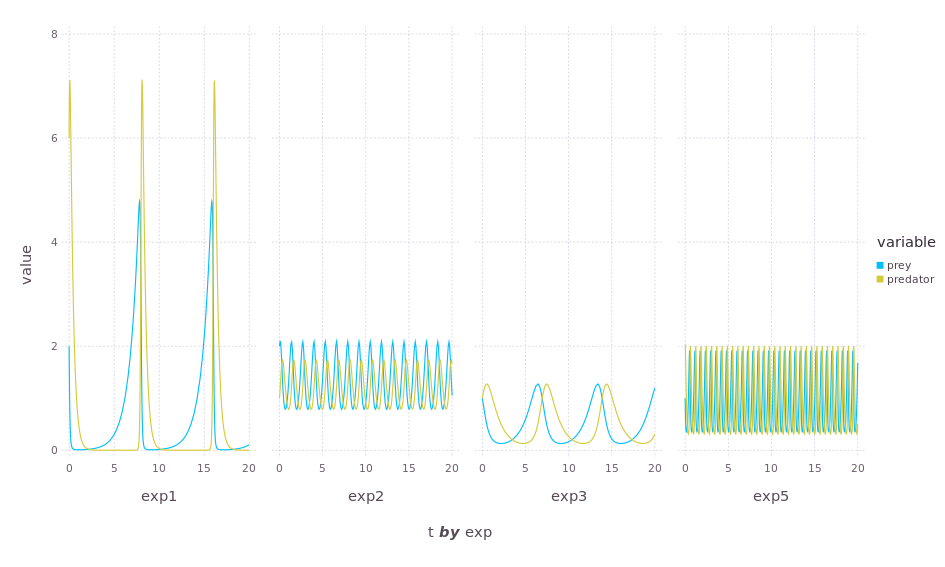

In [5]:
set_default_plot_size(25cm, 15cm)
plot(stack(df, [:prey, :predator]),  x="t", y="value", xgroup="exp", color=:variable, Geom.subplot_grid(Geom.line))

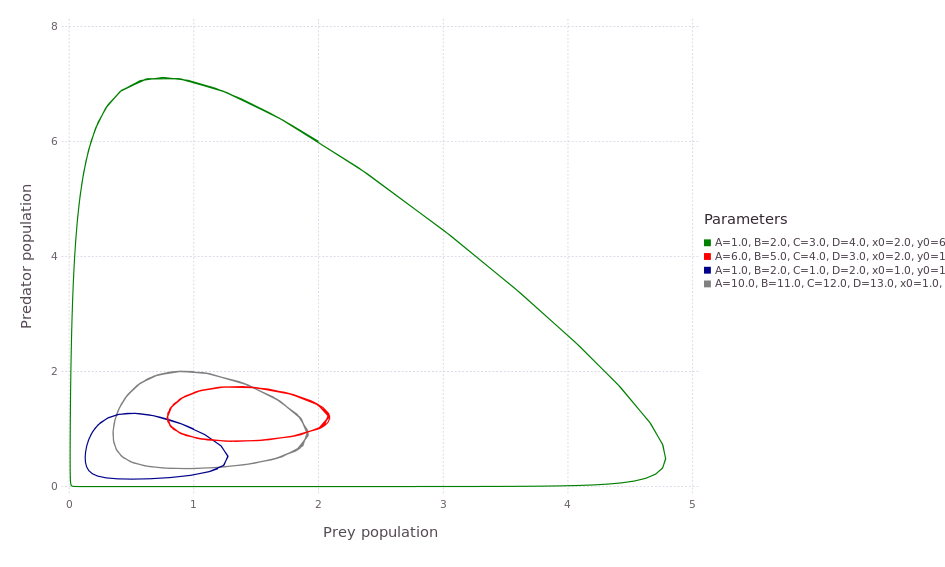

In [7]:
layers = Vector()
colors = ["green", "red", "darkblue","grey"]
used_colors = Vector()
labels = Vector()
i = 1

for (idf, info, i) in zip(dfs, df_infos, 1:length(dfs))
    push!(layers, layer(idf, x=:x, y=:y, Theme(default_color=colors[i]) , Geom.path))
    push!(used_colors, colors[i])
    push!(labels, "A=$(info[1,:a]), B=$(info[1,:b]), C=$(info[1,:c]), D=$(info[1,:d]), x0=$(info[1,:x0]), y0=$(info[1,:y0])")
end

plot(layers..., Guide.manual_color_key("Parameters",labels, colors),
    Guide.xlabel("Prey population"),
    Guide.ylabel("Predator population"))